### Resampling data and plotting it with pandas and Matplotlib 

We did our first data analysis with a large data set and saw how we could answer a research question based on a simple categorization. Although it produced good results, that sort of analysis is limited: it looks at the data at only one point in time. Analyzing data across time, on the other hand, allows us to look for trends and better understand the anomalies we encounter. By exploring the changes in data and isolating specific events, we can make meaningful connections between them. 

This data on evictions in New York was [downloaded from the NYC Open Portal site](https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4/about_data).

Here are the steps we need to take:
- Filter our data using a lambda function
- Format a data column into a datetime 
- Use the resample function
- plot the data with matplotlib


Let's start by important `pandas` and `matplotlib` (`import matplotlib.pyplot as plt`):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the csv file with the evictions data:

In [2]:
%%time
evictions = pd.read_csv('../data/Evictions_20240615.csv')

CPU times: user 158 ms, sys: 21.8 ms, total: 180 ms
Wall time: 181 ms


In [3]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,318594/23,14150,172 WEST 107TH ST,1W,01/04/2024,David,Smith,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.800704,-73.964267,7.0,7.0,193.0,1055977.0,1.018610e+09,Morningside Heights
1,016134/18,86658,70 BRUCKNER BLVD.,12E,11/29/2018,Henry,Daley,Residential,BRONX,10454,Not an Ejectment,Possession,40.806321,-73.926264,1.0,8.0,19.0,2116953.0,2.022950e+09,Mott Haven-Port Morris
2,300816/222,209993,23 WYONA STREET,NaN,11/30/2022,Richard,Capuano,Residential,QUEENS,11207,Not an Ejectment,Possession,40.678696,-73.894650,5.0,37.0,1146.0,3389505.0,3.036630e+09,Cypress Hills-City Line
3,K52673/17,94663,601 BRIGHTON BEACH A VE,FRONT GROUND STORE,04/12/2017,Darlene,Barone,Commercial,BROOKLYN,11235,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79638/19,173756,540 NEW LOTS AVE,1R,01/18/2024,Alfred,Locascio,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.663958,-73.888289,5.0,42.0,1122.0,3096753.0,3.043040e+09,East New York (Pennsylvania Ave)


In [4]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

In [5]:
evictions['BOROUGH'].value_counts()

BOROUGH
BRONX            29264
BROOKLYN         26830
QUEENS           17803
MANHATTAN        15189
STATEN ISLAND     3428
Name: count, dtype: int64

### Resampling our data over time

To get a tally of these tweets over time we need to:
- format a column as a date time
- set the index of our dataframe to this date time column
- resample our dataframe 

In [6]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

In [7]:
evictions['Executed Date'] = evictions['Executed Date'].astype('datetime64[ns]')

In [8]:
evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial               object
BOROUGH                              object
Eviction Postcode                     int64
Ejectment                            object
Eviction/Legal Possession            object
Latitude                            float64
Longitude                           float64
Community Board                     float64
Council District                    float64
Census Tract                        float64
BIN                                 float64
BBL                                 float64
NTA                                  object
dtype: object

In [9]:
evictions_over_time = evictions.set_index('Executed Date')
evictions_over_time.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Executed Date,,,,,,,,,,,,,,,,,,,
2024-01-04,318594/23,14150,172 WEST 107TH ST,1W,David,Smith,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.800704,-73.964267,7.0,7.0,193.0,1055977.0,1.018610e+09,Morningside Heights
2018-11-29,016134/18,86658,70 BRUCKNER BLVD.,12E,Henry,Daley,Residential,BRONX,10454,Not an Ejectment,Possession,40.806321,-73.926264,1.0,8.0,19.0,2116953.0,2.022950e+09,Mott Haven-Port Morris
2022-11-30,300816/222,209993,23 WYONA STREET,NaN,Richard,Capuano,Residential,QUEENS,11207,Not an Ejectment,Possession,40.678696,-73.894650,5.0,37.0,1146.0,3389505.0,3.036630e+09,Cypress Hills-City Line
2017-04-12,K52673/17,94663,601 BRIGHTON BEACH A VE,FRONT GROUND STORE,Darlene,Barone,Commercial,BROOKLYN,11235,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18,79638/19,173756,540 NEW LOTS AVE,1R,Alfred,Locascio,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.663958,-73.888289,5.0,42.0,1122.0,3096753.0,3.043040e+09,East New York (Pennsylvania Ave)


In [10]:
evictions_tally = evictions_over_time.resample('M')["Court Index Number"].count()
evictions_tally.head()

Executed Date
2017-01-31    2237
2017-02-28    1695
2017-03-31    2040
2017-04-30    1860
2017-05-31    2080
Freq: M, Name: Court Index Number, dtype: int64

### Plot your data 

Now it's time to plot your data to better understand trends over time!

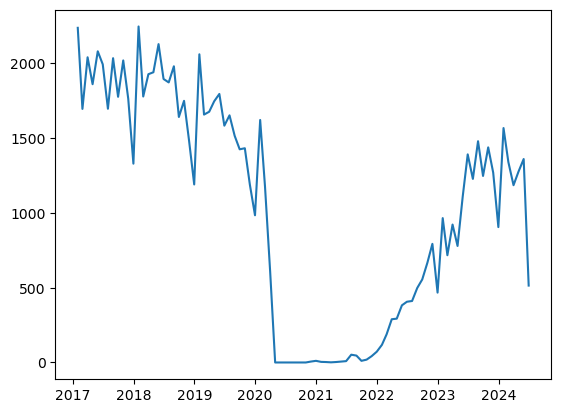

In [11]:
plt.plot(evictions_tally)

In [12]:
len(evictions_tally)

90

In [13]:
len(evictions)

92514

### Modifying your chart

First, there are so many ways to do the same thing:

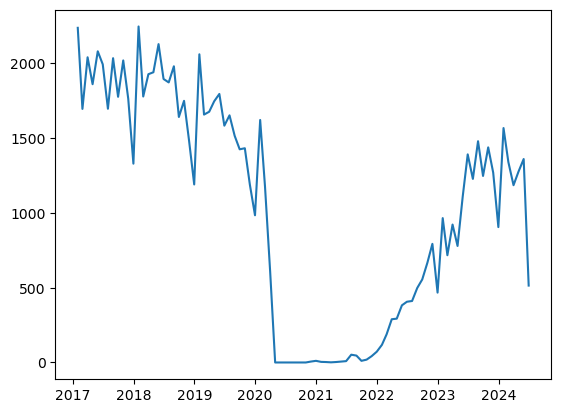

In [14]:
plt.plot(evictions_tally)

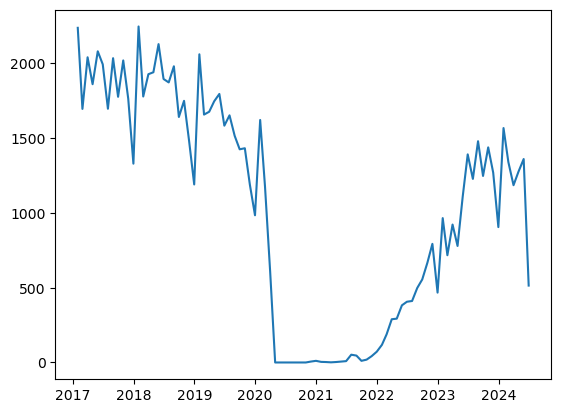

In [15]:
fig, ax = plt.subplots()  # Create a figure containing a single axes (using a different function)
ax.plot(evictions_tally)

<Axes: xlabel='Executed Date'>

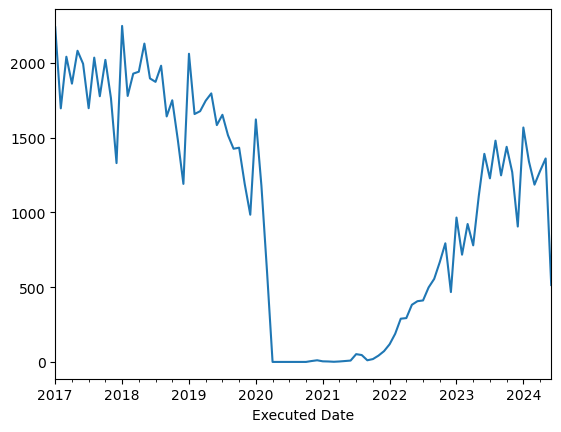

In [16]:
evictions_tally.plot()

#### Labeling your charts

NameError: name 'monthly_tweet_count' is not defined

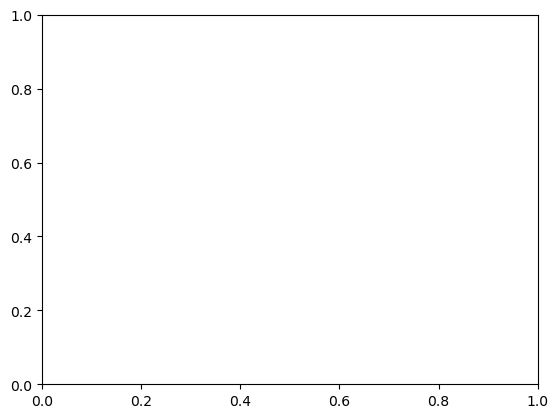

In [17]:
fig, ax = plt.subplots()
ax.plot(monthly_tweet_count)
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('num_tweets', fontsize=14)
ax.set_title('Tweets about Clinton or Trump from Iranian bots', fontsize=14)


#### Changing the size of your chart

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.plot(evictions_tally)


#### Other chart types

##### Bar Charts

In [ ]:
ranked_boroughs = evictions["BOROUGH"].value_counts().reset_index()

print(len(ranked_boroughs))
ranked_boroughs

In [ ]:
ranked_boroughs.plot(x="BOROUGH", y="count", kind="barh")


##### pie charts

In [ ]:
plt.pie(ranked_boroughs["count"], labels=ranked_boroughs["BOROUGH"])


##### Multiple charts

In [ ]:
fig,ax =  plt.subplots(1,2)
ax[0].barh(ranked_boroughs["BOROUGH"],ranked_boroughs["count"], color = '#b84ab4')
ax[1].plot(evictions_tally, color='lightblue')


#### Saving your charts

In [ ]:
plt.plot(evictions_tally)
plt.savefig('../output/chart.svg')
plt.savefig('../output/chart.png')